In [250]:
import numpy as math_library
import matplotlib.pyplot as plotter
from matplotlib.colors import ListedColormap as colour_chooser


In [251]:
#constants
GRID_SIZE = 100
DENSITY = .25 #percentage of particles in the solution by volume
RUN_CYCLE = 100

In [252]:
#creating the grid
row_count = col_count = int(GRID_SIZE/2)
grid = math_library.zeros((row_count, col_count))
for i in range(row_count):
        for j in range(col_count):
            # If the random number is greater than the empty ratio, assign an agent to the cell
            if math_library.random.random() < DENSITY:
                grid[i][j] = 1

grid[int(row_count/2)][int(col_count/2)] = 2 #place impurity

In [253]:
for time in range (RUN_CYCLE):
    for i in range(row_count):
        for j in range(col_count):
               if grid[i][j] == 1:
                    for x, y in ((i-1, j), (i+1, j), (i, j-1), (i, j+1)):
                        if 0 <= x < row_count and 0 <= y < col_count and grid[x][y] == 0:
                            grid[x][y] = 1
                            grid[i][j] = 0
                            for a, b in ((x-1, y), (x+1, y), (x, y-1), (x, y+1)):
                                if 0 <= a < row_count and 0 <= b < col_count and grid[a][b] == 2:
                                    grid[x][y] = 2
                                    break



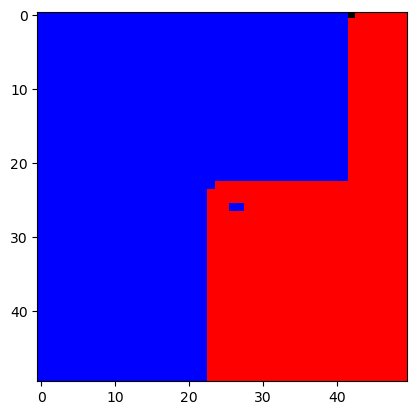

In [254]:
#plotting the grid

colors = ["black", "blue", "red"] # setting the colours array according to the global variables
cmap = colour_chooser(colors)
plotter.imshow(grid, cmap = cmap, interpolation= 'nearest')
plotter.show()

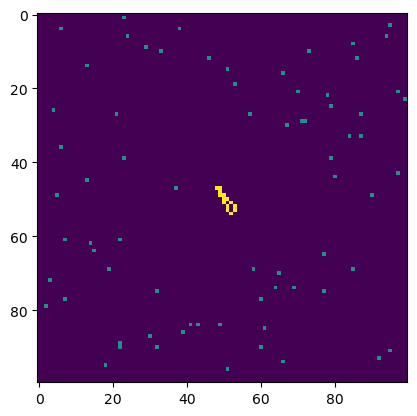

In [255]:
import random
import matplotlib.pyplot as plt

# Define the grid size and number of particles
grid_size = 100
num_particles = 75
# Define the states
EMPTY = 0
PARTICLE = 1
CRYSTAL = 2

# Initialize the grid
grid = [[EMPTY for x in range(grid_size)] for y in range(grid_size)]

# Scatter particles randomly
for i in range(num_particles):
    x = random.randint(0, grid_size-1)
    y = random.randint(0, grid_size-1)
    grid[x][y] = PARTICLE

# Place the seed
grid[grid_size//2][grid_size//2] = CRYSTAL

# Define the update function
def update(grid):
    # Create a copy of the grid to update
    new_grid = [row[:] for row in grid]
    # Loop over all cells in the grid
    for x in range(grid_size):
        for y in range(grid_size):
            # If the cell contains a particle
            if grid[x][y] == PARTICLE:
                # Move particle
                dx = random.randint(-1, 1)
                dy = random.randint(-1, 1)
                new_x = (x + dx) % grid_size
                new_y = (y + dy) % grid_size
                # If the new cell is empty, move the particle there
                if new_grid[new_x][new_y] == EMPTY:
                    new_grid[new_x][new_y] = PARTICLE
                    new_grid[x][y] = EMPTY
                # Check for crystal formation
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        if dx == dy == 0:
                            continue
                        new_x = (x + dx) % grid_size
                        new_y = (y + dy) % grid_size
                        # If a neighboring cell is a crystal, turn this cell into a crystal as well
                        if grid[new_x][new_y] == CRYSTAL:
                            new_grid[x][y] = CRYSTAL
    return new_grid

# Run the simulation for a fixed number of steps
num_steps = 1000
for step in range(num_steps):
    # Update the grid at each time step
    grid = update(grid)


plt.imshow(grid)
plt.show()

In [259]:
import random
import imageio
import numpy as np

# Define the grid size and number of particles
grid_size = 1000
num_particles = 75000

# Define the states
EMPTY = 0
PARTICLE = 1
CRYSTAL = 2

# Initialize the grid
grid = [[EMPTY for x in range(grid_size)] for y in range(grid_size)]

# Scatter particles randomly
for i in range(num_particles):
    x = random.randint(0, grid_size-1)
    y = random.randint(0, grid_size-1)
    grid[x][y] = PARTICLE

# Place the seed
grid[grid_size//2][grid_size//2] = CRYSTAL

# Define the update function
def update(grid):
    # Create a copy of the grid to update
    new_grid = [row[:] for row in grid]
    # Loop over all cells in the grid
    for x in range(grid_size):
        for y in range(grid_size):
            # If the cell contains a particle
            if grid[x][y] == PARTICLE:
                # Move particle
                dx = random.randint(-1, 1)
                dy = random.randint(-1, 1)
                new_x = (x + dx) % grid_size
                new_y = (y + dy) % grid_size
                # If the new cell is empty, move the particle there
                if new_grid[new_x][new_y] == EMPTY:
                    new_grid[new_x][new_y] = PARTICLE
                    new_grid[x][y] = EMPTY
                # Check for crystal formation
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        if dx == dy == 0:
                            continue
                        new_x = (x + dx) % grid_size
                        new_y = (y + dy) % grid_size
                        # If a neighboring cell is a crystal, turn this cell into a crystal as well
                        if grid[new_x][new_y] == CRYSTAL:
                            new_grid[x][y] = CRYSTAL
    return new_grid

# Define a function to generate an image from the grid
def generate_image(grid):
    image = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)
    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x][y] == PARTICLE:
                image[x,y] = [255, 255, 255]
            elif grid[x][y] == CRYSTAL:
                image[x,y] = [255, 0, 0]
    return image

# Run the simulation and generate an animated GIF
num_steps = 10000
images = []
for step in range(num_steps):
    # Update the grid at each time step
    grid = update(grid)
    # Generate an image of the current state of the grid and add it to the list of images
    image = generate_image(grid)
    images.append(image)

# Save the list of images as an animated GIF
imageio.mimsave('animation.gif', images)